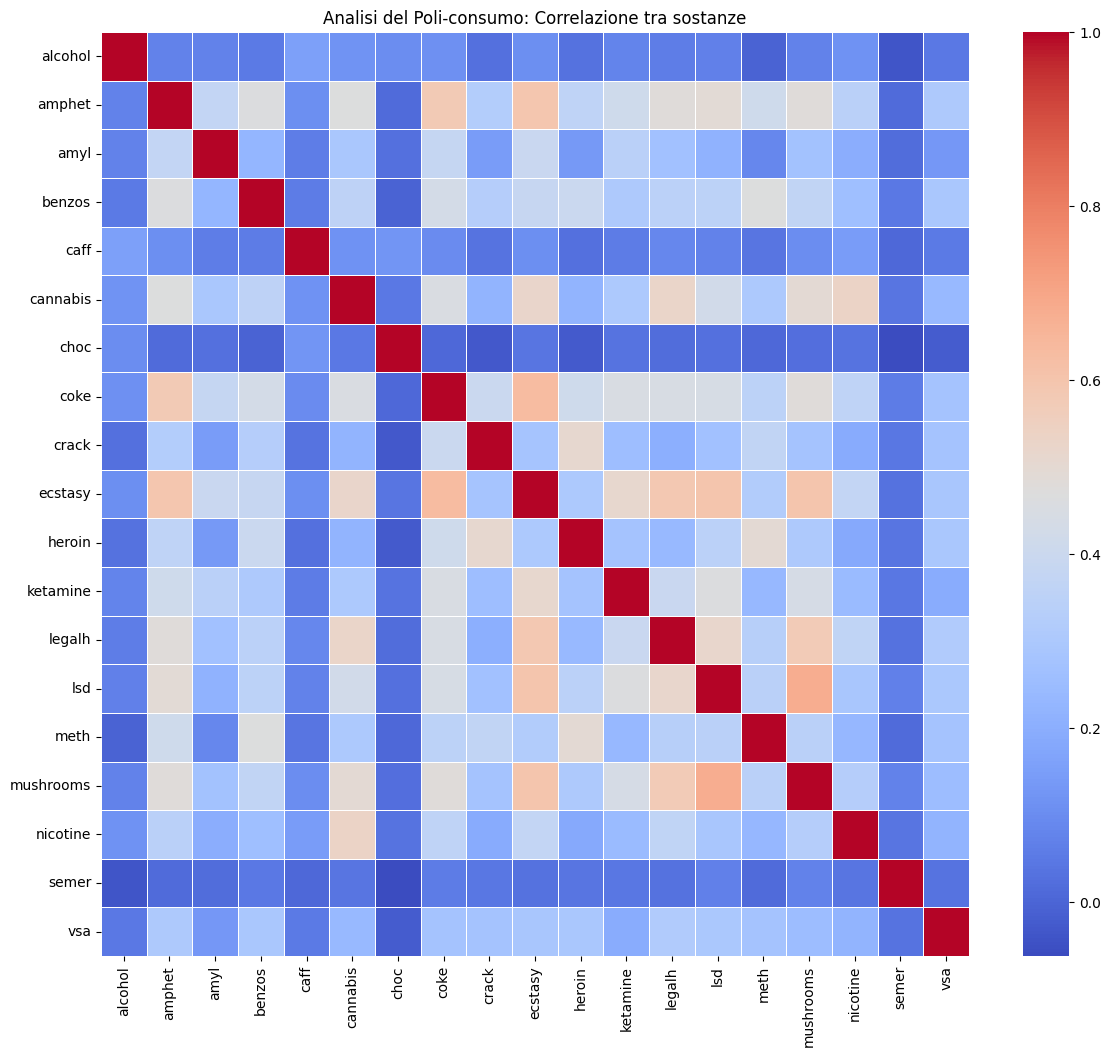

In [1]:
!pip install ucimlrepo -q
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import warnings

warnings.filterwarnings('ignore')

drug_consumption = fetch_ucirepo(id=373)
targets = drug_consumption.data.targets.copy()

targets_binary = targets.replace(
    {'CL0': 0, 'CL1': 0, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
)

corr_matrix = targets_binary.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Analisi del Poli-consumo: Correlazione tra sostanze")
plt.show()